In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
from matplotlib import pyplot as plt
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [14]:
csv_path = 'file:///Users/Stefan/Downloads/video_game_sales.csv'
project_data = pd.read_csv(csv_path)
project_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df1 = project_data.iloc[:,10].mul(1000000)
df2 = pd.DataFrame(df1, dtype=int)
del project_data['Global_Sales']
final_data = pd.merge(project_data, df2, left_index=True, right_index=True)
final_data.head()
# converting the global sales value into the millions and updating the dtype to millions

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82740000
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40240000
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35820000
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33000000
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31370000


In [5]:
new = final_data[['Year','Global_Sales']]
new.head()
# reducing the data into the two column format for the utilization of the prophet function

,Year,Global_Sales
0,2006.0,82740000
1,1985.0,40240000
2,2008.0,35820000
3,2009.0,33000000
4,1996.0,31370000


In [6]:
df3 = new.rename(columns={'Year':'ds','Global_Sales':'y'})
df4 = df3.dropna()
df4['ds'] = df4['ds'].astype(int)
df4.head()
# changing the column names for prophet and updating the dtype of column 1 to an integer

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ds,y
0,2006,82740000
1,1985,40240000
2,2008,35820000
3,2009,33000000
4,1996,31370000


In [7]:
df5 = pd.to_datetime(df4.ds, format='%Y')
df6 = df4['y']
df = pd.concat([df5,df6], axis=1, sort=False)
df
# formulating the ds column to match the required datetime setting

,ds,y
0,2006-01-01,82740000
1,1985-01-01,40240000
2,2008-01-01,35820000
3,2009-01-01,33000000
4,1996-01-01,31370000
5,1989-01-01,30260000
6,2006-01-01,30010000
7,2006-01-01,29020000
8,2009-01-01,28620000
9,1984-01-01,28310000


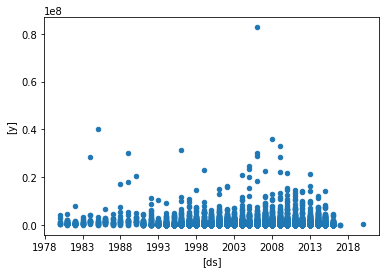

In [8]:
df.plot.scatter(['ds'], ['y'])


In [9]:
model = Prophet()
model.fit(df);

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda2/lib/python2.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [10]:
future = model.make_future_dataframe(periods = 365)
future

,ds
0,1980-01-01
1,1980-01-01
2,1980-01-01
3,1980-01-01
4,1980-01-01
5,1980-01-01
6,1980-01-01
7,1980-01-01
8,1980-01-01
9,1981-01-01


INFO:fbprophet.diagnostics:Making 3 forecasts with cutoffs between 2014-01-02 00:00:00 and 2018-01-01 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-01-01,651547.518186,-1.445415e+06,2.621570e+06,140000,2014-01-02
1,2015-01-01,651547.518186,-1.311493e+06,2.661890e+06,40000,2014-01-02
2,2015-01-01,651547.518186,-1.389747e+06,2.700418e+06,4470000,2014-01-02
3,2015-01-01,651547.518186,-1.356679e+06,2.772859e+06,30000,2014-01-02
4,2015-01-01,651547.518186,-1.320131e+06,2.717600e+06,8490000,2014-01-02


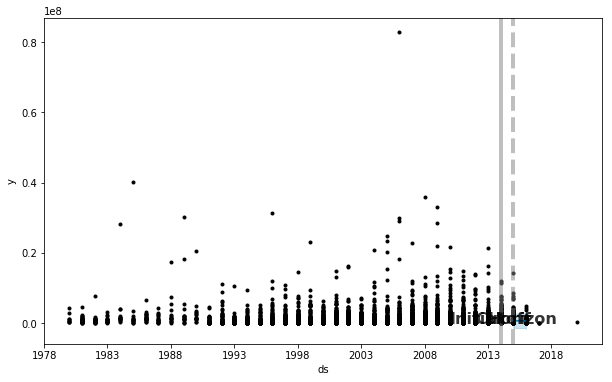

In [11]:
df_cv = cross_validation(
    model, '730 days', initial='12045 days', period='730 days')
cutoff = df_cv['cutoff'].unique()[0]
df_cv = df_cv[df_cv['cutoff'].values == cutoff]

fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(model.history['ds'].values, model.history['y'], 'k.')
ax.plot(df_cv['ds'].values, df_cv['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv['ds'].values, df_cv['yhat_lower'],
                df_cv['yhat_upper'], color='#0072B2',
                alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')
ax.text(x=pd.to_datetime('2010-01-01'),y=12, s='Initial', color='black',
       fontsize=16, fontweight='bold', alpha=0.8)
ax.text(x=pd.to_datetime('2012-01-01'),y=12, s='Cutoff', color='black',
       fontsize=16, fontweight='bold', alpha=0.8)
ax.axvline(x=pd.to_datetime(cutoff) + pd.Timedelta('365 days'), c='gray', lw=4,
           alpha=0.5, ls='--')
ax.text(x=pd.to_datetime('2013-01-01'),y=6, s='Horizon', color='black',
       fontsize=16, fontweight='bold', alpha=0.8);
df_cv.head()

In [12]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
343,364 days,5.579529e+11,746962.426583,583051.303065,11.299163,0.947368
326,364 days,5.592649e+11,747840.137667,584209.197802,11.478787,0.947368
324,364 days,5.626463e+11,750097.543184,588419.724118,11.600714,0.947368
309,364 days,5.622569e+11,749837.933061,588103.934644,11.394963,0.947368
310,364 days,5.618675e+11,749578.233025,587788.145170,11.189211,0.947368


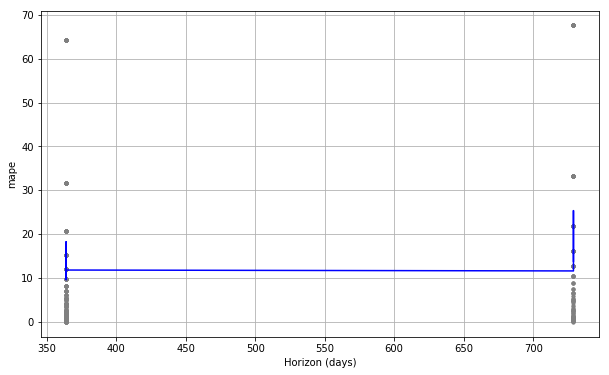

In [13]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

I am honestly still somewhat confused about the application of the above process and how it relates to our specific probelm.  